In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [2]:
data = pd.read_csv('housing.csv')

In [3]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
data.dropna(inplace=True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [6]:
x = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size = 0.2)

In [8]:
train_data = x_train.join(y_train)

In [9]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
16024,-122.46,37.73,52.0,2857.0,469.0,1431.0,496.0,5.2088,NEAR BAY,344200.0
1788,-122.36,37.94,43.0,369.0,107.0,371.0,111.0,1.6000,NEAR BAY,79400.0
7156,-118.15,34.04,44.0,647.0,142.0,457.0,143.0,3.6875,<1H OCEAN,162500.0
13852,-117.28,34.51,10.0,4676.0,884.0,2845.0,812.0,3.0181,INLAND,100400.0
6949,-118.08,34.00,32.0,1165.0,358.0,997.0,361.0,0.9817,<1H OCEAN,166300.0
...,...,...,...,...,...,...,...,...,...,...
12582,-121.43,38.52,43.0,2089.0,399.0,955.0,385.0,2.5898,INLAND,72100.0
19989,-119.32,36.19,11.0,1281.0,291.0,861.0,313.0,1.0962,INLAND,72300.0
13913,-116.06,34.20,29.0,1202.0,290.0,383.0,156.0,1.3371,INLAND,66900.0
7751,-118.15,33.92,28.0,1038.0,252.0,912.0,245.0,2.5875,<1H OCEAN,161200.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

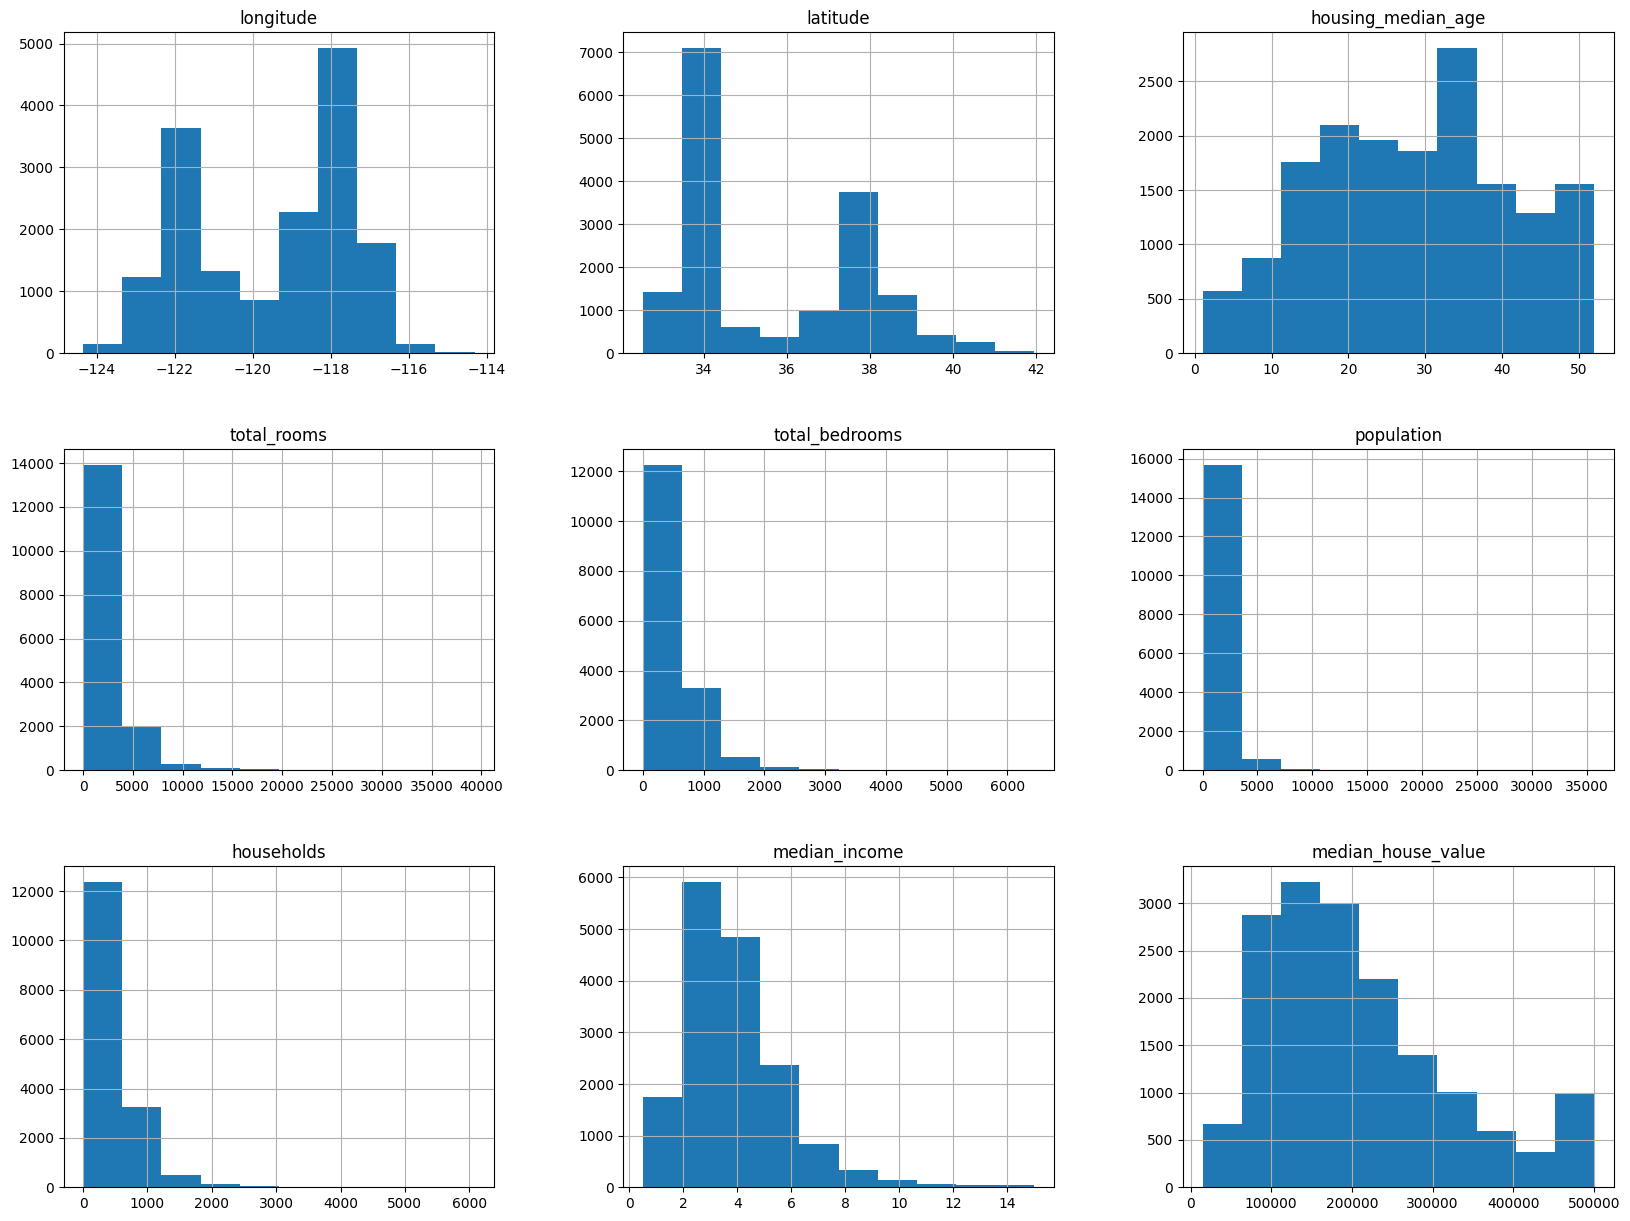

In [10]:
train_data.hist(figsize=(20,15))

In [11]:
train_data['total_rooms'] = np.log1p(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log1p(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log1p(train_data['population'] + 1)
train_data['households'] = np.log1p(train_data['households'] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

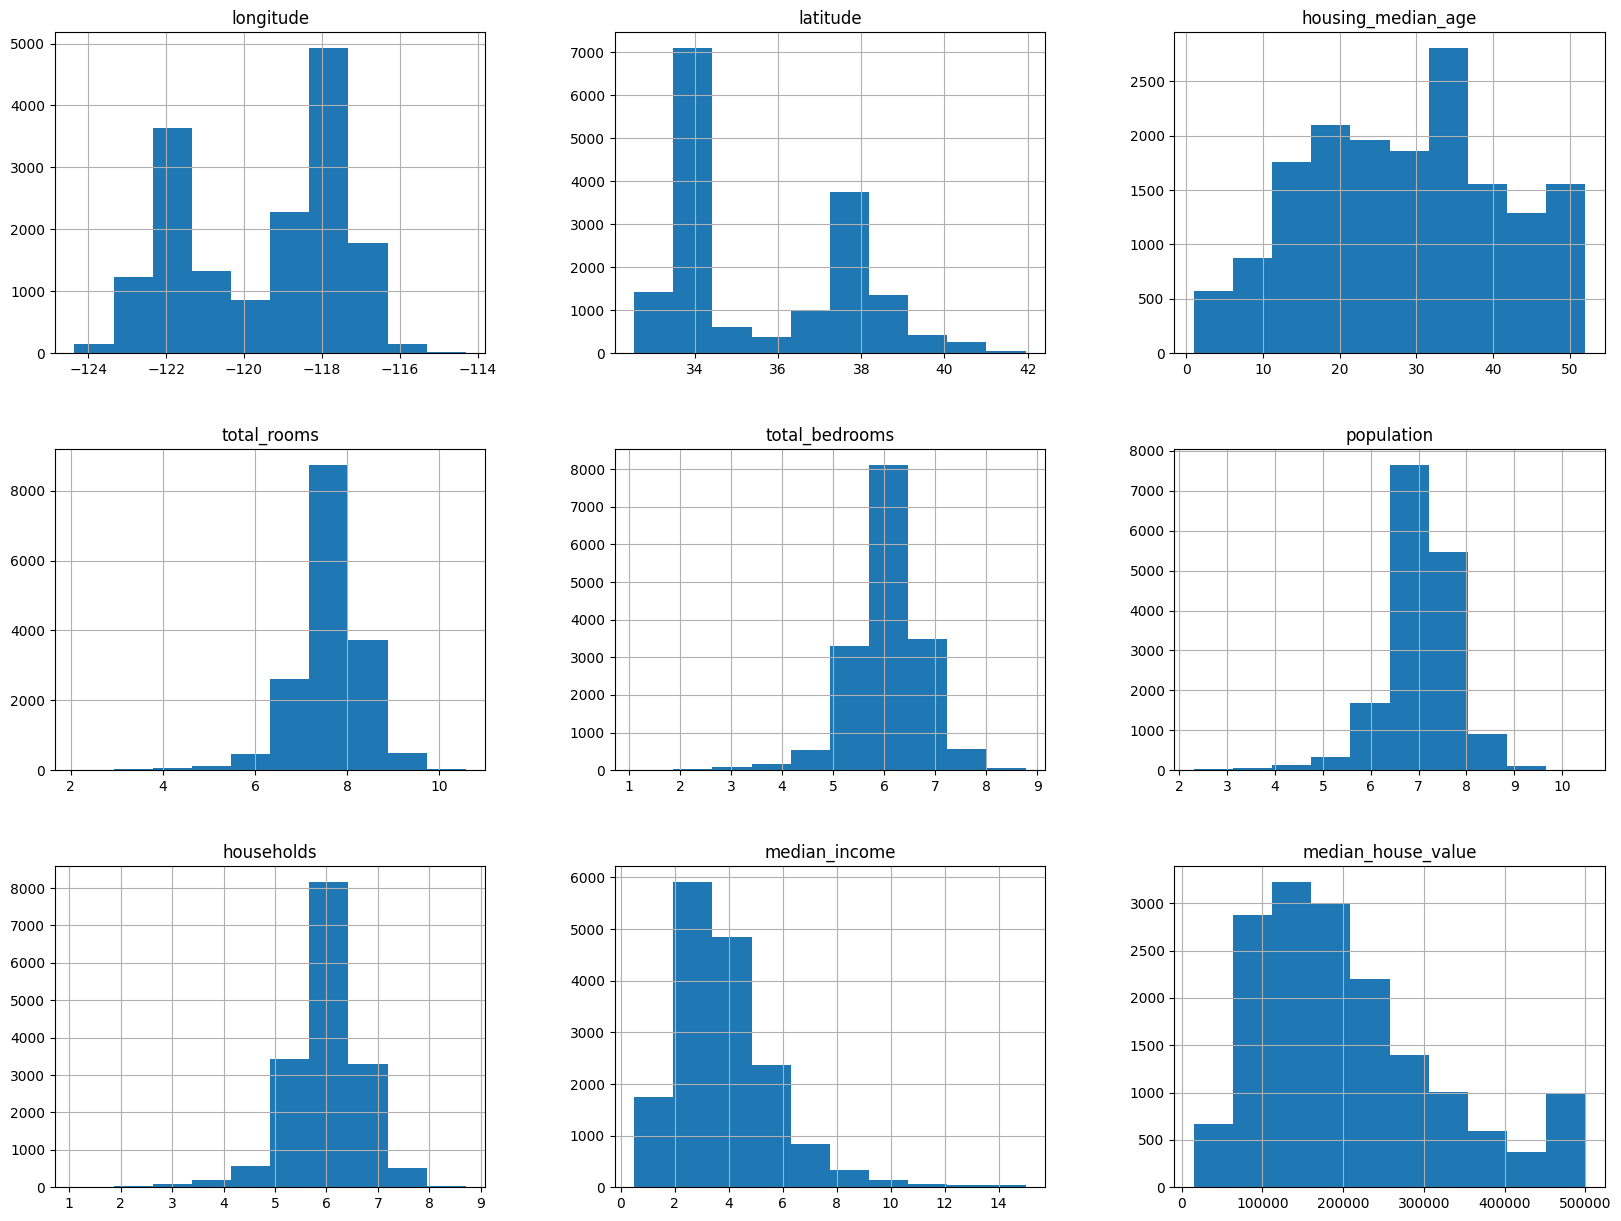

In [12]:
train_data.hist(figsize=(20,15))

In [13]:
train_data = pd.get_dummies(train_data, columns=['ocean_proximity'])

In [14]:
bool_cols = train_data.select_dtypes('bool').columns
train_data[bool_cols] = train_data[bool_cols].astype(int)

In [15]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
16024,-122.46,37.73,52.0,7.958227,6.154858,7.267525,6.210600,5.2088,344200.0,0,0,0,1,0
1788,-122.36,37.94,43.0,5.916202,4.691348,5.921578,4.727388,1.6000,79400.0,0,0,0,1,0
7156,-118.15,34.04,44.0,6.475433,4.969813,6.129050,4.976734,3.6875,162500.0,1,0,0,0,0
13852,-117.28,34.51,10.0,8.450626,6.786717,7.954021,6.701960,3.0181,100400.0,0,1,0,0,0
6949,-118.08,34.00,32.0,7.062192,5.886104,6.906755,5.894403,0.9817,166300.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12582,-121.43,38.52,43.0,7.645398,5.993961,6.863803,5.958425,2.5898,72100.0,0,1,0,0,0
19989,-119.32,36.19,11.0,7.156956,5.680173,6.760415,5.752573,1.0962,72300.0,0,1,0,0,0
13913,-116.06,34.20,29.0,7.093405,5.676754,5.953243,5.062595,1.3371,66900.0,0,1,0,0,0
7751,-118.15,33.92,28.0,6.946976,5.537334,6.817831,5.509388,2.5875,161200.0,1,0,0,0,0


<Axes: >

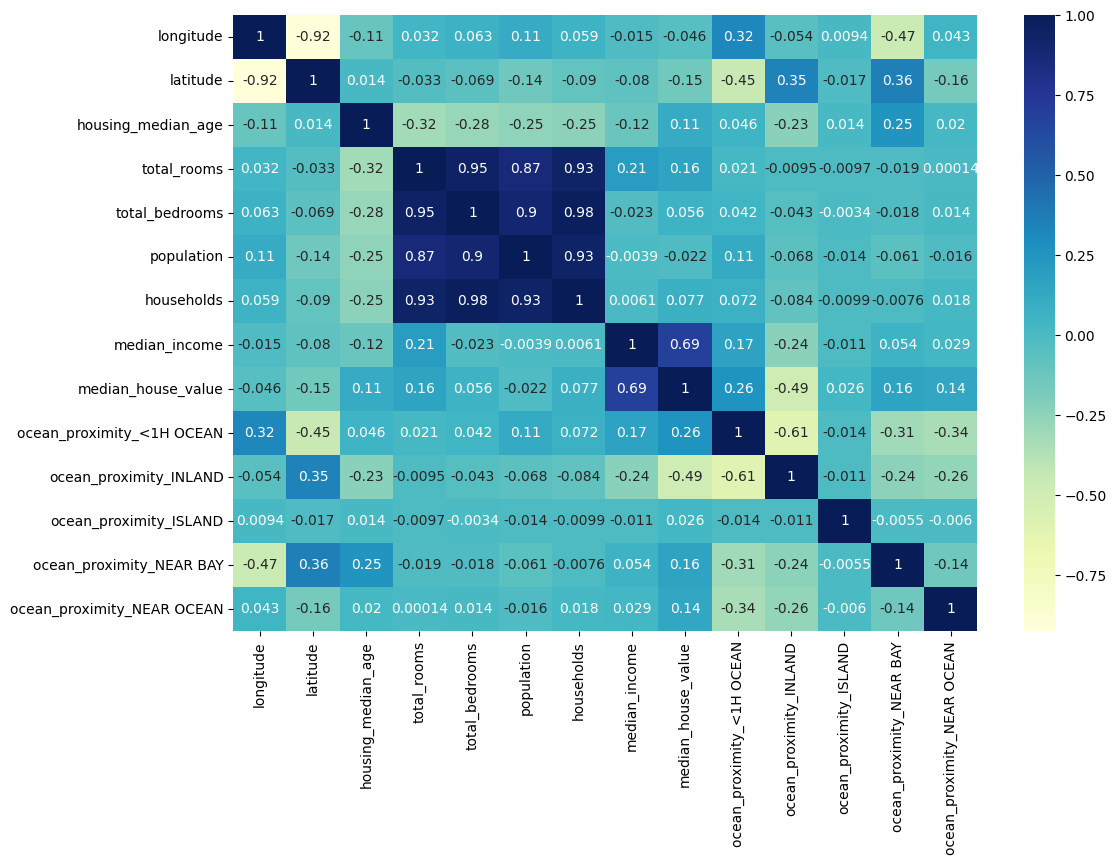

In [16]:
plt.figure(figsize=(12,8))
sns.heatmap(train_data.corr(), annot = True, cmap = 'YlGnBu')

<Axes: xlabel='latitude', ylabel='longitude'>

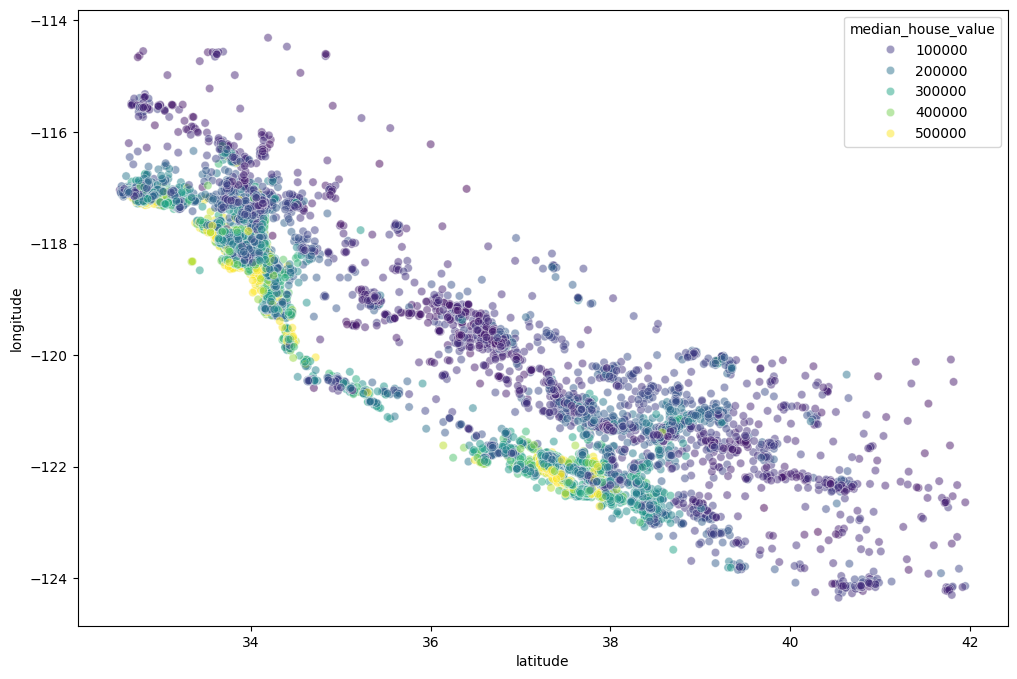

In [17]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=train_data, x='latitude', y='longitude', hue='median_house_value', palette='viridis', alpha=0.5)

In [18]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']

<Axes: >

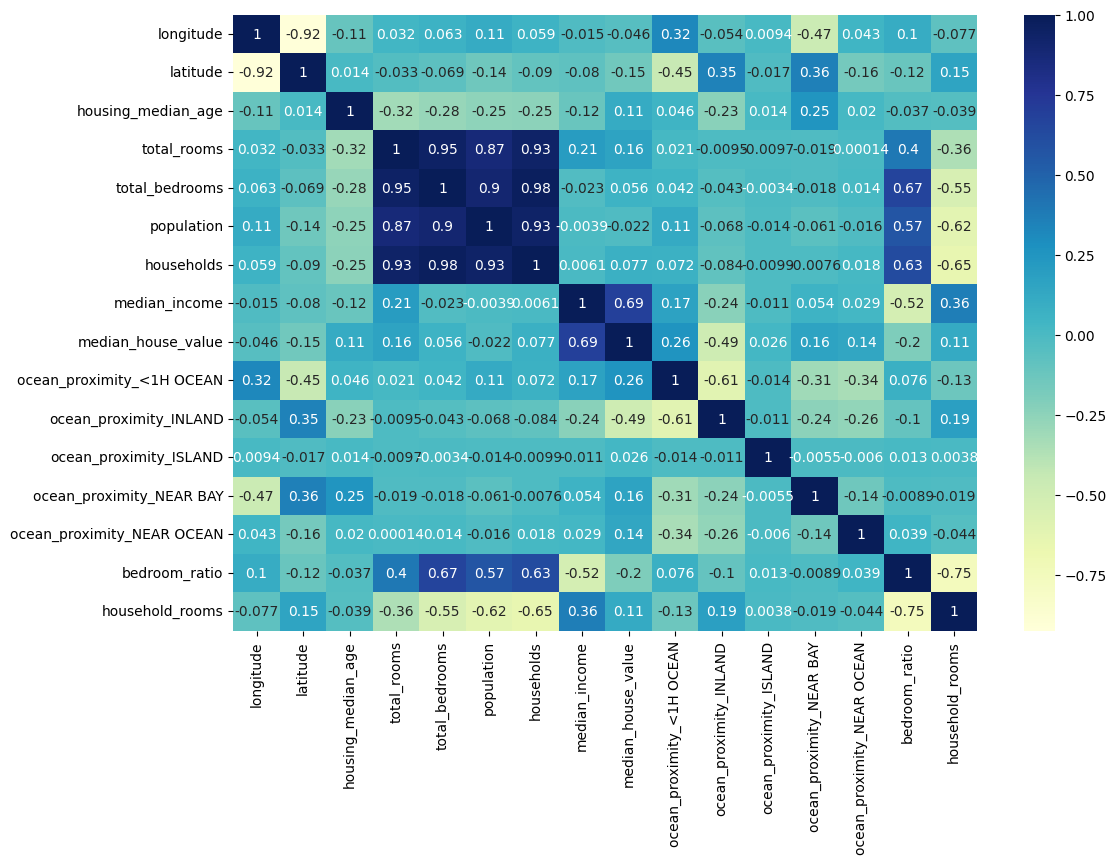

In [19]:
plt.figure(figsize=(12,8))
sns.heatmap(train_data.corr(), annot = True, cmap = 'YlGnBu')

In [20]:
x_train = train_data.drop(['median_house_value'], axis=1)
y_train = train_data['median_house_value']
reg = LinearRegression()
reg.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [21]:
test_data = x_test.join(y_test)

test_data['total_rooms'] = np.log1p(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log1p(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log1p(test_data['population'] + 1)
test_data['households'] = np.log1p(test_data['households'] + 1)

test_data = pd.get_dummies(test_data, columns=['ocean_proximity'])
bol_cols = test_data.select_dtypes('bool').columns
test_data[bol_cols] = test_data[bol_cols].astype(int)
for col in train_data.columns:
    if col not in test_data.columns:
        test_data[col] = 0 

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']

In [22]:
x_test = test_data.drop(['median_house_value'], axis=1)
y_test = test_data['median_house_value']

In [23]:
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,bedroom_ratio,household_rooms
9692,-121.65,36.69,21.0,8.972844,7.607381,8.498826,7.560601,2.7367,160300.0,1,0,0,0,0,0.847823,1.186790
20198,-119.19,34.26,16.0,8.521185,6.751101,7.834392,6.723832,5.1752,218000.0,0,0,0,0,1,0.792273,1.267311
15697,-122.45,37.79,52.0,7.285507,5.379897,6.208590,5.347108,10.7097,500001.0,0,0,0,1,0,0.738438,1.362514
3165,-118.85,35.20,17.0,7.932003,6.522093,7.850883,6.466145,1.9907,51200.0,0,1,0,0,0,0.822250,1.226697
14139,-117.07,32.75,31.0,7.619724,6.220590,7.142827,6.095825,2.5583,120700.0,0,0,0,0,1,0.816380,1.249991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17128,-122.14,37.47,37.0,8.124151,6.705639,7.976252,6.561031,2.8868,156600.0,0,0,0,1,0,0.825396,1.238243
3233,-119.63,36.18,23.0,5.342334,3.850148,5.153292,3.951244,2.4286,100000.0,0,1,0,0,0,0.720686,1.352064
9481,-123.34,39.39,18.0,7.945555,6.445720,7.401231,6.424869,2.3333,84000.0,1,0,0,0,0,0.811236,1.236688
10215,-117.90,33.87,34.0,7.253470,5.683580,6.948897,5.707110,3.4338,195200.0,1,0,0,0,0,0.783567,1.270953


In [25]:
x_test = x_test[x_train.columns]
reg.score(x_test,y_test)

0.6386788647622105

In [27]:
forest = RandomForestRegressor()
forest.fit(x_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [28]:
forest.score(x_test, y_test)

0.8060780752894289

In [33]:
scaler = StandardScaler()
x_train_s = scaler.fit_transform(x_train)
x_test_s = scaler.fit_transform(x_test)

In [31]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [3, 10, 30],
    "max_features": [2, 4, 6, 8]
}

grid_search = GridSearchCV(forest, param_grid, cv = 5,
                           scoring = 'neg_mean_squared_error',
                           return_train_score = True)

grid_search.fit(x_train_s, y_train)


,estimator,RandomForestRegressor()
,param_grid,"{'max_features': [2, 4, ...], 'n_estimators': [3, 10, ...]}"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,True
,n_estimators,30


In [32]:
best_forest = grid_search.best_estimator_

In [35]:
best_forest.score(x_test_s, y_test)

0.7878242908067883